In [1]:
import json
import matplotlib.pyplot as plt
import os

def plot_log(json_path):
    if not os.path.exists(json_path):
        print(f"File not found: {json_path}")
        return

    with open(json_path, 'r') as f:
        data = json.load(f)

    history = data['history']
    epochs = [h['epoch'] for h in history]
    train_loss = [h['train_loss'] for h in history]
    val_loss = [h['val_loss'] for h in history]

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(epochs, train_loss, label='Training Loss', color='#3b82f6', linewidth=2)
    plt.plot(epochs, val_loss, label='Validation Loss', color='#ef4444', linewidth=2, linestyle='--')
    
    # Highlight the minimum validation point
    min_val_loss = min(val_loss)
    min_epoch = epochs[val_loss.index(min_val_loss)]
    plt.scatter(min_epoch, min_val_loss, color='black', zorder=5)
    plt.text(min_epoch, min_val_loss + 0.05, f'Best: {min_val_loss:.4f}', ha='center')

    plt.title('Roof Segmentation Training Progress (DGCNN + Discriminative Loss)', fontsize=14)
    plt.xlabel('Epochs', fontsize=12)
    plt.ylabel('Loss', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend()
    
    output_file = 'training_curve.png'
    plt.savefig(output_file)
    print(f"Plot saved to {output_file}")
    plt.show()

Plot saved to training_curve.png


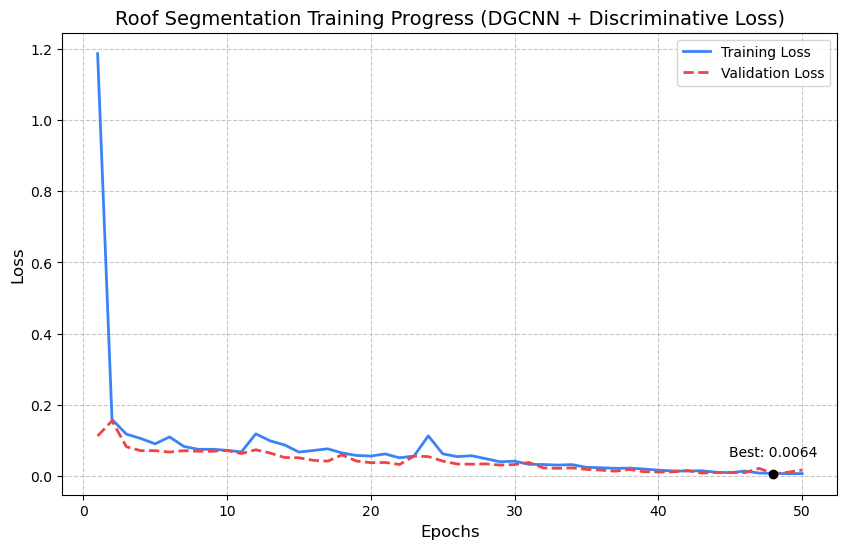

In [3]:
if __name__ == "__main__":
    plot_log("logs/training_log.json")